# Importing depenencies


In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("D:\House Price Prediction\House Price Prediction Dataset.csv")


In [3]:
data.head(10)


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [4]:

data.shape



(2000, 10)

In [5]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [6]:
print(data)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

In [7]:
data.describe()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [8]:
import matplotlib.pyplot as plt
numerical_cols = data.select_dtypes(include='number')

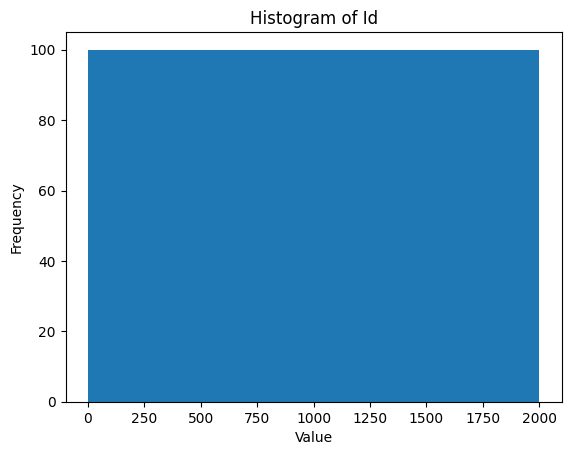

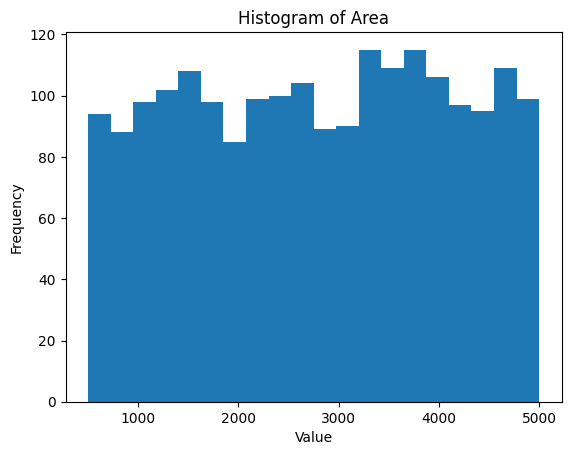

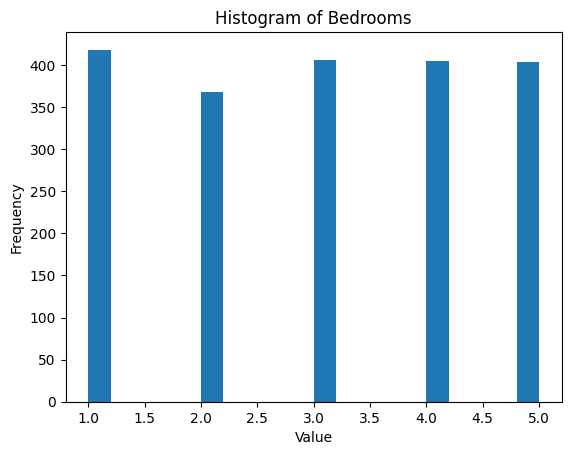

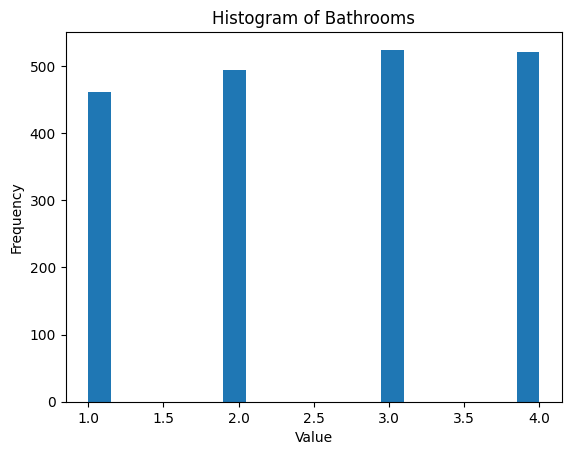

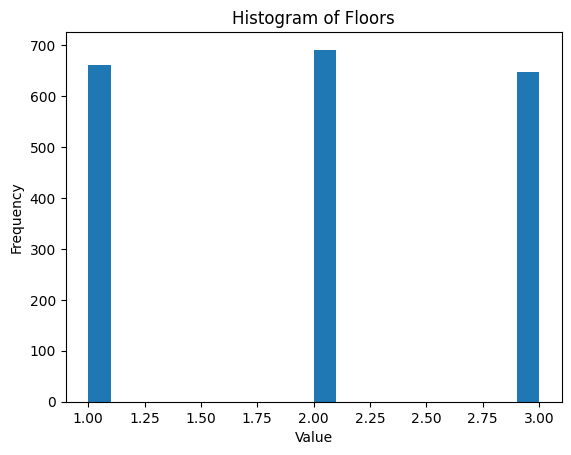

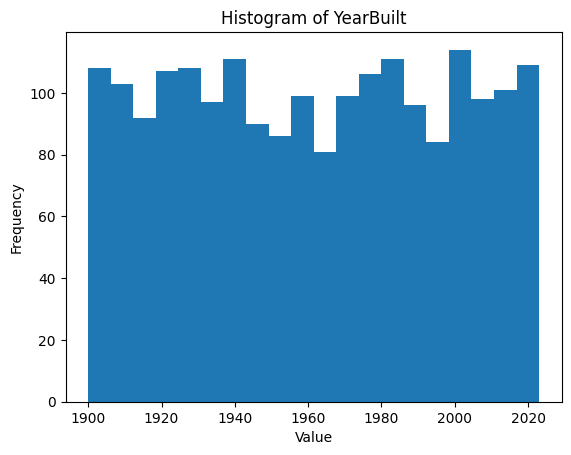

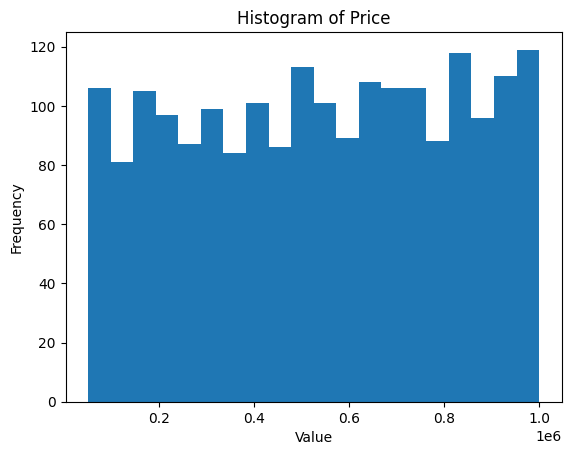

In [9]:
import matplotlib.pyplot as plt
numerical_cols = data.select_dtypes(include='number')

for col in numerical_cols:
    plt.hist(numerical_cols[col], bins=20)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.savefig(f'Histogram_{col}.jpg')
    plt.show()

In [10]:
import sklearn.datasets

In [11]:
print(data)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

In [12]:
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [14]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix on the numeric data
correlation = numeric_data.corr()

# Display the correlation matrix
print(correlation)


                 Id      Area  Bedrooms  Bathrooms    Floors  YearBuilt  \
Id         1.000000 -0.012966 -0.016393  -0.025433 -0.002025   0.008840   
Area      -0.012966  1.000000  0.047523   0.021881  0.017749  -0.011609   
Bedrooms  -0.016393  0.047523  1.000000  -0.011990  0.010435  -0.014125   
Bathrooms -0.025433  0.021881 -0.011990   1.000000  0.029089  -0.000839   
Floors    -0.002025  0.017749  0.010435   0.029089  1.000000  -0.006474   
YearBuilt  0.008840 -0.011609 -0.014125  -0.000839 -0.006474   1.000000   
Price     -0.025643  0.001542 -0.003471  -0.015737  0.055890   0.004845   

              Price  
Id        -0.025643  
Area       0.001542  
Bedrooms  -0.003471  
Bathrooms -0.015737  
Floors     0.055890  
YearBuilt  0.004845  
Price      1.000000  


<Axes: >

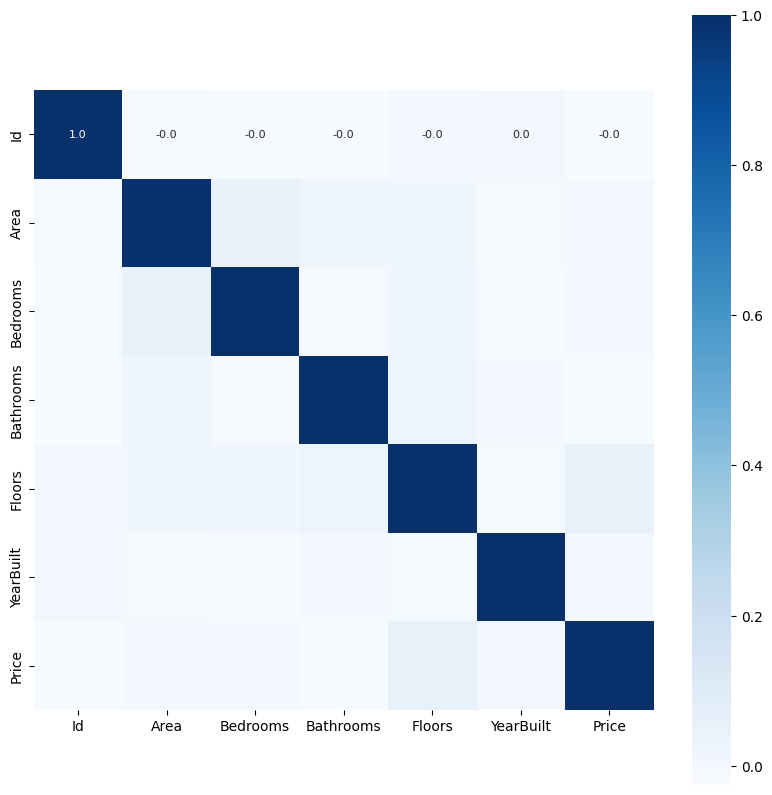

In [15]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

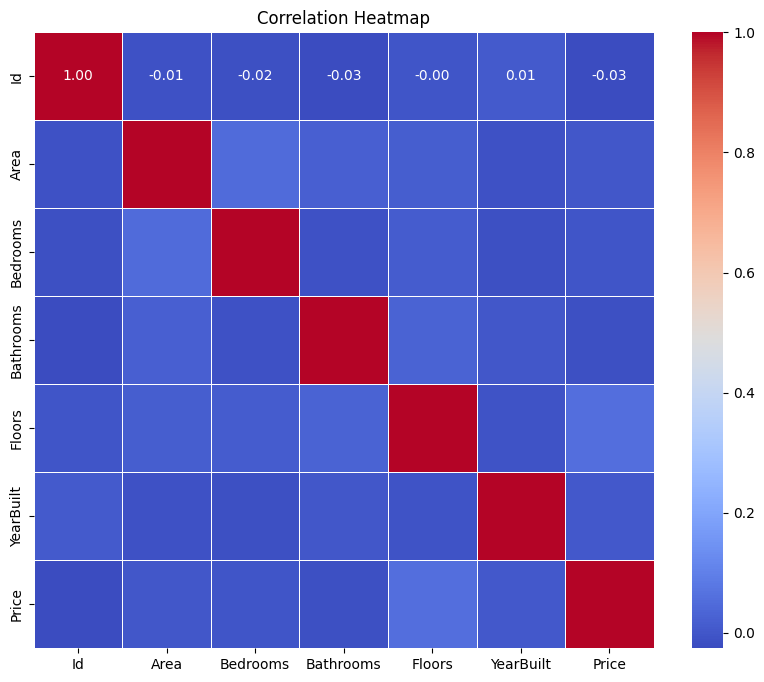

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title("Correlation Heatmap")
plt.show()


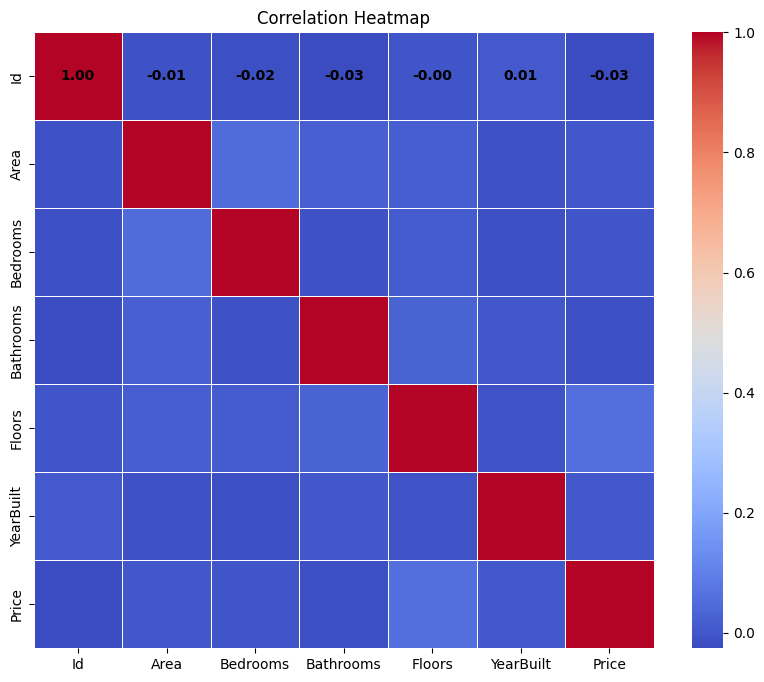

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})

# Display the plot
plt.title("Correlation Heatmap")
plt.show()


In [22]:
print(data.columns)


Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [24]:
print(data.head())


   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [25]:
print(data.columns)


Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [26]:
# Assuming 'price' is the target column
X = data.drop(['Price'], axis=1)  # Drop the target column from features
Y = data['Price']  # The target column (house price)


In [27]:
print(X)
print(Y)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage  
0        No  

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics




X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Model Training


In [29]:
# loading the model
model = XGBRegressor()

In [30]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Location', 'Condition', 'Garage']  # Update with your actual categorical column names

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Now, you can split the data and train the model
X = data.drop(['Price'], axis=1)  # Assuming 'price' is the target column
Y = data['Price']


In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [32]:
# Step 1: Handle missing values
data = data.fillna(data.mean())  # For numerical columns, fill with mean
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])  # For categorical columns

# Step 2: Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Condition'] = label_encoder.fit_transform(data['Condition'])
data['Garage'] = label_encoder.fit_transform(data['Garage'])


In [33]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Assuming `data` is your DataFrame

# Step 1: Handle missing values
data = data.fillna(data.mean())  # For numerical columns, fill with mean
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])  # For categorical columns

# Step 2: Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Condition'] = label_encoder.fit_transform(data['Condition'])
data['Garage'] = label_encoder.fit_transform(data['Garage'])

# Step 3: Define features (X) and target (Y)
X = data.drop(['Price'], axis=1)
Y = data['Price']

# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 5: Train an XGBoost model with enable_categorical=True
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, enable_categorical=True)
model.fit(X_train, Y_train)

# Step 6: Make predictions
Y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")



Root Mean Squared Error (RMSE): 315065.2509401798


In [34]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [35]:
print(training_data_prediction)

[434324.84 614771.6  922811.06 ... 323138.6  274997.7  644205.94]


In [36]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999999999975452
Mean Absolute Error :  0.28921630859375


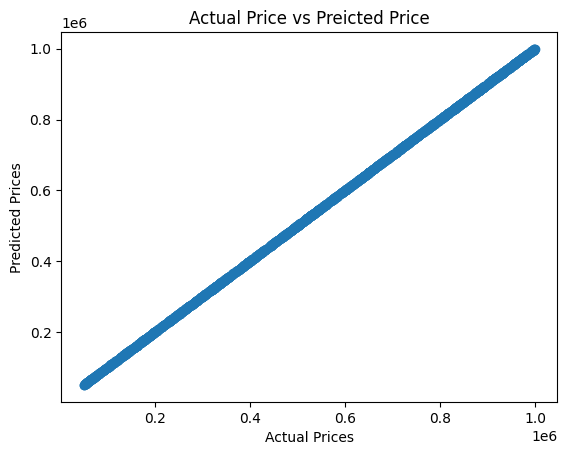

In [37]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [38]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [39]:

# Step 6: Evaluate the model

# R-squared error (R2 score)
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error (MAE)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error (MSE)
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean Squared Error (RMSE)
score_4 = np.sqrt(score_3)

print(f"R-squared: {score_1}")
print(f"Mean Absolute Error: {score_2}")
print(f"Mean Squared Error: {score_3}")
print(f"Root Mean Squared Error: {score_4}")

R-squared: -0.2759332529616201
Mean Absolute Error: 268964.853046875
Mean Squared Error: 99266112349.99847
Root Mean Squared Error: 315065.2509401798


In [40]:
#  R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  -0.2759332529616201
Mean Absolute Error :  268964.853046875
